# Julia Basic Syntax

## Variables
A variable is simply a named value.

In [1]:
w = 10 # Int
x = 1.0 # Float64
y = true # Bool

true

Assignments (like most Julia code) are an ***expression***.
Meaning it has a *value* equal to the RHS.
This lets us, for instance, chain assignments:

In [2]:
i = j = 5 # both i and j are equal to 5

5

Variables are not constrained to a particular type.

In [3]:
z = "Howdy folks!" # reassign z to a different type.

"Howdy folks!"

Julia has support for Unicode variable names.
In VSCode and the REPL we can use autocompletion such as `\Sigma`-TAB-`\hat`-TAB-`\^2`-TAB

In [4]:
Σ̂² = 1.0

1.0

The RHS of each of the expressions above is a *literal*.
Julia allows for *numeric* literals to be **immediately** followed by a variable, which results in multiplication:

In [5]:
3x

3.0

This helps us write long equations very nicely:

In [6]:
4(x + 3)^2 - 10

54.0

This functionality is also used for complex number literals, with the global constant `im`:

In [7]:
10 + 3im

10 + 3im

Julia has rich support for arrays. More on that later, but for now we can define a `Vector`
of Float64 numbers as:

In [8]:
a = [1.0, 2.0, π]

3-element Vector{Float64}:
 1.0
 2.0
 3.141592653589793

We will also encounter `Tuple`s frequently. Unlike a Vector (or the more general Array)
`Tuple`s are *immutable* (they cannot be modified) and *fixed-length*. Tuple literals are written as:

In [9]:
t = (a, 1.0, "Good Morning!")

([1.0, 2.0, 3.141592653589793], 1.0, "Good Morning!")

## Operators and Functions
Like most languages Julia has two syntaxes for operating on values: operators and function calls.

### Operators
There is a very rich set of operators

In [10]:
w + x

11.0

In [11]:
2 ^ 5

32

There are also Unicode operators, for instance this is integer division:

In [12]:
5 ÷ 2 # (`5 \div`-TAB-`2`)

2

In [13]:
∛8 # `\cbrt`-TAB-`8`

2.0

The boolean operators are:

In [14]:
!y # negation
false && y # short circuiting and
y || true # short circuiting or

true

There are operators that update a variable, such as:

In [15]:
w += 3

13

### Functions
Functions are called much as they are in Python or similar languages:

In [16]:
sin(2x)

0.9092974268256817

In [17]:
length(a)

3

In [18]:
complex(1.0, 10)

1.0 + 10.0im

There are three syntaxes for defining functions. The first two produce named functions, the general form:

In [19]:
function foo(x, y)
    # we don't actually need the `return` here
    # the last expression is returned by default
    return x + y
end

foo (generic function with 1 method)

And the terse form which is typically used if your function is a single expression:

In [20]:
bar(x, y) = x + y

bar (generic function with 1 method)

We can call this function as above:

In [21]:
foo(w, x)

14.0

#### Keyword and optional arguments
We can add "keyword" arguments to a function by placing them after a semicolon in the arguments:

In [22]:
function mykwargs(a; b)
    a ^ b
end;

Both positional arguments and keyword arguments can be made optional by providing a default value.
Ignore the `@show` for now we'll get to that later, it prints out the expression and its result.

In [23]:
function myoptionalfunc(a = 2; b = 3)
    a ^ b
end
@show myoptionalfunc()
@show myoptionalfunc(b = 3)
@show myoptionalfunc(5)

myoptionalfunc() = 8
myoptionalfunc(b = 3) = 8
myoptionalfunc(5) = 125


125

Operators are "just" functions with support for infix notation (except `&&` and `||` which uniquely short circuit)

In [24]:
+(1, 2, 3, 4)

10

In [25]:
f = *;
f(1, 2, 3)

6

#### Functions are data
Just like strings or vectors and can be assigned to variables:

In [26]:
baz = foo
baz(w, x)

14.0

They can also be passed to other functions:

In [27]:
map(sin, [1.0, 2.0, π])

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 1.2246467991473532e-16

#### Anonymous functions
The third syntax for defining a function is for so-called anonymous functions (functions without a name)

In [28]:
x -> 5x + (x - 1)^2

#3 (generic function with 1 method)

Of course we didn't give it a name, so now we have no way to reference it!
These are most often used to pass to "higher-order" functions (functions that accept other functions as arguments):

In [29]:
map(x -> 5x + (x - 1)^2, a)

3-element Vector{Float64}:
  5.0
 11.0
 20.294382361858737

For anonymous functions with multiple arguments the syntax looks like this:

In [30]:
(x, y, z) -> x/3 + y^3 + z^2

#7 (generic function with 1 method)

or with zero arguments like this:

In [31]:
() -> 2 + 2

#9 (generic function with 1 method)

### Broadcasting
We often encounter situations where we want to call a function such as `sin`
over all elements of a collection like a `Vector`.
In order to make this ergonomic Julia supports a generalized "broadcasting" syntax:

In [32]:
sin.([1, 2, 3])

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

Any function can be suffixed with a `.` in order to broadcast it elementwise over each value in a collection.
This also works elementwise, for instance:

In [33]:
complex.([1, 2, 3], [10, 20, 30])

3-element Vector{Complex{Int64}}:
 1 + 10im
 2 + 20im
 3 + 30im

or with operators in infix form:

In [34]:
[1, 2, 3] .+ [4, 5, 6]

3-element Vector{Int64}:
 5
 7
 9

## Control Flow
We now know how to define variables, call functions and operators, and define functions.
We'll use the following function that computes a single point in the mandelbrot set to explore control flow:

In [35]:
function mandel(z)
	c = z
	maxiter = 80
	for n in 1:maxiter
	  if abs(z) > 2
		  return n-1
	  end
	  z = z^2 + c
	end
	return maxiter
end

mandel(1 + 2im)

0

We need a complex plane to compute the set on:

In [36]:
resolution = 0.02
reals = -2:resolution:1
imgs = -1:resolution:1

-1.0:0.02:1.0

In [37]:
plane = [complex(re, img) for (re, img) in Iterators.product(reals, imgs)]

151×101 Matrix{ComplexF64}:
  -2.0-1.0im   -2.0-0.98im   -2.0-0.96im  …   -2.0+0.98im   -2.0+1.0im
 -1.98-1.0im  -1.98-0.98im  -1.98-0.96im     -1.98+0.98im  -1.98+1.0im
 -1.96-1.0im  -1.96-0.98im  -1.96-0.96im     -1.96+0.98im  -1.96+1.0im
 -1.94-1.0im  -1.94-0.98im  -1.94-0.96im     -1.94+0.98im  -1.94+1.0im
 -1.92-1.0im  -1.92-0.98im  -1.92-0.96im     -1.92+0.98im  -1.92+1.0im
  -1.9-1.0im   -1.9-0.98im   -1.9-0.96im  …   -1.9+0.98im   -1.9+1.0im
 -1.88-1.0im  -1.88-0.98im  -1.88-0.96im     -1.88+0.98im  -1.88+1.0im
 -1.86-1.0im  -1.86-0.98im  -1.86-0.96im     -1.86+0.98im  -1.86+1.0im
 -1.84-1.0im  -1.84-0.98im  -1.84-0.96im     -1.84+0.98im  -1.84+1.0im
 -1.82-1.0im  -1.82-0.98im  -1.82-0.96im     -1.82+0.98im  -1.82+1.0im
      ⋮                                   ⋱                     ⋮
  0.84-1.0im   0.84-0.98im   0.84-0.96im      0.84+0.98im   0.84+1.0im
  0.86-1.0im   0.86-0.98im   0.86-0.96im      0.86+0.98im   0.86+1.0im
  0.88-1.0im   0.88-0.98im   0.88-0.96im      0.88+0.9

In [38]:
results = mandel.(plane)

151×101 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  1     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  1  1  1     1  1  1  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱     ⋮              ⋮              ⋮
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1   

We're going to use a package called CairoMakie to plot the result:

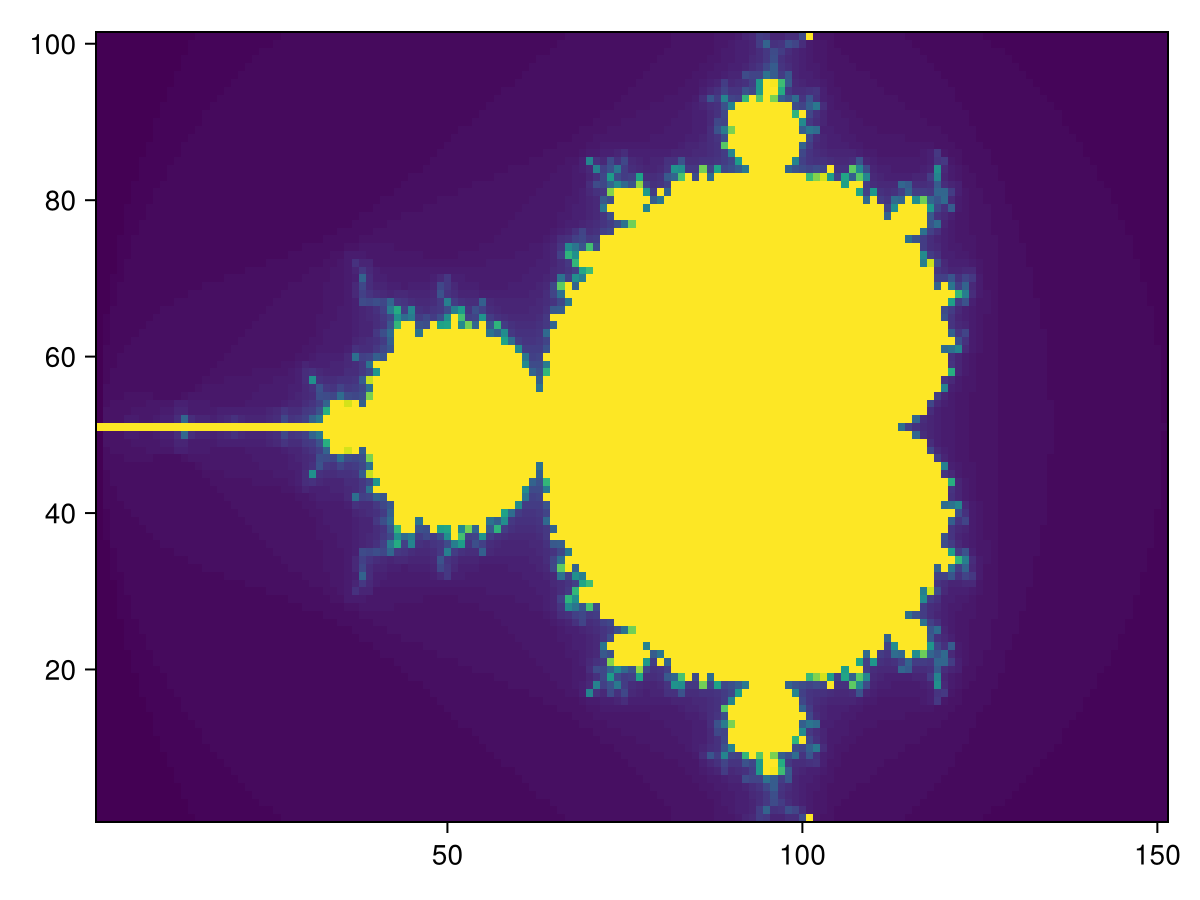

In [39]:
using CairoMakie
heatmap(results)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*